# СБОРНЫЙ ПРОЕКТ: АНАЛИЗ КОМПЬЮТЕРНЫХ ИГР

Заказчик - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нужно выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Представленны данные до **2016 года**.

## Изучение данных из файла

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, date
from scipy import stats as st
# отображаем все колонки датафреймов
pd.set_option("display.max_columns", 30)

In [2]:
# загружаем файл с данными
try:
    data = pd.read_csv("games.csv")
except:
    data = pd.read_csv("/datasets/games.csv")    

Теперь можем ознакомится с данными и посмотреть их основные характеристики.

In [3]:
data.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10021,Phantasy Star Collection,GBA,2002.0,Role-Playing,0.08,0.03,0.00,0.00,76.0,8.1,E
2827,God Eater,PSP,2010.0,Action,0.00,0.00,0.72,0.00,NaN,NaN,NaN
14199,Kekkaishi: Kokubourou no Kage,Wii,2007.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
10433,The Godfather: Mob Wars,PSP,2006.0,Action,0.09,0.00,0.00,0.01,59.0,7.9,M
3844,Mission: Impossible,PS,1999.0,Action,0.29,0.20,0.00,0.03,NaN,NaN,NaN
6337,NASCAR 2011: The Game,PS3,2011.0,Racing,0.25,0.00,0.00,0.02,62.0,3.7,E
7490,Discovery Kids: Pony Paradise,DS,2009.0,Simulation,0.19,0.00,0.00,0.01,NaN,tbd,E
10031,Retro Game Challenge,DS,2007.0,Action,0.00,0.00,0.11,0.00,77.0,7.3,E
5137,Bottom of the 9th,N64,1999.0,Sports,0.37,0.00,0.00,0.00,NaN,NaN,NaN
10989,GripShift,PSP,2005.0,Racing,0.08,0.00,0.00,0.01,70.0,8.7,E


Описание данных:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу видны проблемы с типами данных. Столбец с годом релиза очевидно не должен принадлежать к типу `float64`. А столбец `User_Score` явно числовой. Как видим в данных есть пропуски. Посмотрим сколько процентов пропусков в каждом из столбцов.

In [5]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Очень много (больше 50%) пропусков в колонке `Critic_Score`, по 40% в колонках `User_Score` и `Rating`. Незначительное количество пропущенных значений в колонках `Name` и `Genre`, а также `Year_of_Release`.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В датафрейме представленны данные с 1980 по 2016год. Самая высокая оценка критиков 98, самая низкая - 13.

In [7]:
data.select_dtypes(include=["object"]).describe()

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


В датасете у нас `11559` уникальных названий игр. Самое часто встречающееся название игры - `Need for Speed: Most Wanted`. Из 31 одной платформы чаще всего встречается `PS2`. Жанров всего 12, видимо самый популярный - `Action`. Чаще всего в колонке с рейтингами встречается рейтинг `Е`. Непонятно значение **tbd**, которое является самым часто встречающимся в колонке `User_Score`. Т.к.по описанию мы знаем. что оценка пользователей должна быть от 1 до 10 с этим значение нужно разбираться отдельно.

In [8]:
data['Platform'].value_counts().sort_values()

PCFX       1
GG         1
TG16       2
3DO        3
SCD        6
WS         6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: Platform, dtype: int64

В столбце с платформами вроде бы все нормально.

In [9]:
data['Genre'].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: Genre, dtype: int64

Тоже все понятно.

In [10]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть аббревиатура 'tbd' и есть пропуски.

In [11]:
data['Rating'].value_counts().sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: Rating, dtype: int64

Есть четыре основных категории рейтинга. Остальные встречаются очень редко.

### Вывод

После просмотра данных и их основных характеристик можно выделить несколько проблем:
- Названия столбцов с большой буквы, что не очень удобно.
- Очень много пропусков в колонках `Critic_Score`, `User_Score` и `Rating`. И понемногу в других.
- Несоответствие типов данных в столбцах `Year_of_Release` и `User_Score`.
- Странное значение **tbd** в колонке `User_Score`.

## Подготовка данных

Приведем название столбцов к нижнему регистру

In [12]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим на строки с пропущенными значениями в названии и жанре.

In [13]:
data[pd.isnull(data["genre"])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Кроме пропусков в названии и жанре эти строки не содержат также оценок критиков и пользователей, а также рейтинга. Удалим эти две строки. чтоб они не зашумляли остальные данные.

In [14]:
data["genre"].dropna(inplace=True)
data.reset_index()
data["genre"].isna().sum()

0

### Предобработка столбца year_of_release

Посмотрим на пропуски в столбце `year_of_release`.

In [15]:
data[pd.isnull(data["year_of_release"])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполнять не будем, чтобы не искажать данные.

Осталось 146 пропусков. Больше заполнить мы их ничем не можем. Оставим как есть.

Переведем столбец с годом в числовой формат.

In [16]:
# data["year_of_release"] = pd.to_datetime(data["year_of_release"], format="%Y")
data["year_of_release"] = data["year_of_release"].astype("Int64")
display(data["year_of_release"].sample(5))

4173     2006
6757     2002
4330     2010
4847     1996
16468    1996
Name: year_of_release, dtype: Int64

### Предобработка user_score и critic_score

Разберемся со значением `tbd`.

In [17]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце `user_score` мы встретили странное значение **tbd**. На сайте https://yandex.ru/turbo/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie это значение расшифровывается как **To Be Determined**, то есть "Будет определено". Получается значения отсутствуют. Значит заменим абревиатуру **tbd** на **NaN**. А потом подумаем что сделать с пропусками.

In [18]:
data["user_score"] = data["user_score"].where(data["user_score"] != "tbd", np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можно заменить тип данных в этом столбце на `float`.

In [19]:
data['user_score'] = data['user_score'].astype(float)

Вообще не очень рационально заполнять пропуска в столбцах с рейтингами, т.к.это субъективные оценки.

In [20]:
# data["critic_score"] = data['critic_score'].astype("Int64")

### Предобработка столбца Rating

В столбце с рейтингом также много пропусков, у нас есть игры, которые выходили на нескольких платформах и если есть рейтинг на одной, то поставим такой же рейтинг для этой игры и на другой. Для этого сделаем словарь где имени будет соответствовать рейтинг.

In [21]:
# print("Пропусков до замены:", data["rating"].isna().sum())
# dict_rating = data.set_index("name")["rating"].dropna().to_dict()

# def rating (df):
#     if pd.isna(df["rating"]):
#         return dict_rating.get(df["name"])
#     return df["rating"]

# data["rating"] = data.apply(rating, axis=1)
# print("Пропусков после замены:", data["rating"].isna().sum())

Посмотрим нет ли у нас дубликатов.

In [22]:
data.duplicated().sum()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Суммарный объем продаж по всем регионам

Посчитаем сумарные выручки

In [23]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data[["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"]].sample(5)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
1325,0.89,0.31,0.01,0.23,1.44
10486,0.00,0.00,0.10,0.00,0.10
9921,0.10,0.01,0.00,0.01,0.12
13030,0.05,0.00,0.00,0.00,0.05
27,5.51,3.17,5.65,0.80,15.13


### Вывод

В этом разделе мы привели названия столбцов к нижнему регистру, разобрались с неизвестной абревиатурой в рейтинге пользователей, заполнили частично пропуска в колонках `'year_of_release'`, `'critic_score'`, `'user_score'`, `'rating'`. Мы не можем удалить все строки с оставшимися пропущенными значениями, т.к. во-первых это очень большой объем данных, а во-вторых для некоторых вопросов анализа нас интересуют только продажи и раз эти столбцы полностью заполнены оставим весь массив данных. Поменяли типы данных в `user_score` на `float` и в `year_of_release` на `int`. Сначала планировалось заменить год на формат времени, но тогда мы получаем не только год, но и месяц с днем в формате 01-01, думаю для наших целей подойдет вполне дата в формате числа. Также мы посчитали сумарные выручки по регионам.

## Анализ данных

### Анализ игр по годам

Посмотрим сколько игр выпускалось в разные годы.

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


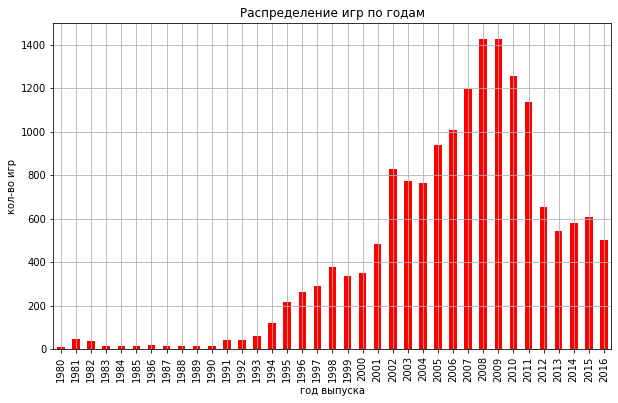

In [24]:
display(data.groupby('year_of_release')["name"].count().reset_index())

data.groupby('year_of_release')["name"].agg("count").plot(kind="bar", figsize=(10, 6), color="r", title="Распределение игр по годам", grid=True)
plt.xlabel("год выпуска")
plt.ylabel("кол-во игр")
plt.show;

Как отчетливо видно на графике с начала зарождения игровой индустрии игр выпускалось мало. Стабильный рост начался около **1993года** и достиг пика в **2008-2009гг**, а дальше неожиданно начинается спад и даже провал в районе **2012года**. Дальше рынок стабилизировался. Я бы назвала актуальным период с **2013г по 2016г**.

### Продажи по платформам. Распределение по годам

Отсортируем платформы по суммарным продажам.

In [25]:
data.groupby('platform')["total_sales"].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Для 6 платформ с наибольшими сумарными продажами посмотрим распределение по годам.

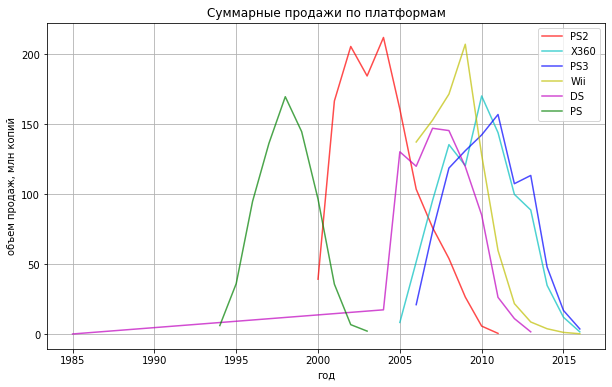

In [26]:
plt.figure(figsize=(10,6))

plt.plot(data.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum(), label="PS2", alpha=0.7, color="r");
plt.plot(data.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum(), label="X360", alpha=0.7, color="c");
plt.plot(data.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum(), label="PS3", alpha=0.7, color="b");
plt.plot(data.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum(), label="Wii", alpha=0.7, color="y");
plt.plot(data.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum(), label="DS", alpha=0.7, color="m");
plt.plot(data.query('platform == "PS"').groupby('year_of_release')['total_sales'].sum(), label="PS", alpha=0.7, color="g");

plt.xlabel("год")
plt.ylabel("объем продаж, млн копий")
plt.title("Суммарные продажи по платформам")
plt.style="o-"
plt.grid()
plt.legend()
plt.show();

Срок существования платформы можно оценить в среднем в **10 лет**, распределение продаж по большей части похоже на нормальное. Интересна платформа `DS`, которая просуществовала с **1985г** аж по **2013год**.

### Лидеры по продажам в актуальном периоде

Создадим отдельную таблицу для нашего актульного периода

In [27]:
actual_data = data.query('2012 < year_of_release')

Теперь посмотрим какие платформы лидируют по продажам в актуальном периоде

In [28]:
actual_data.groupby('platform')["total_sales"].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


На первой позиции в нашем актуальном периоде `PS4`, на третьей `XOne`. Только `PS3` не потеряла актуальности. Посмотрим в разрезе по годам что происходит по продажам на этих платформах

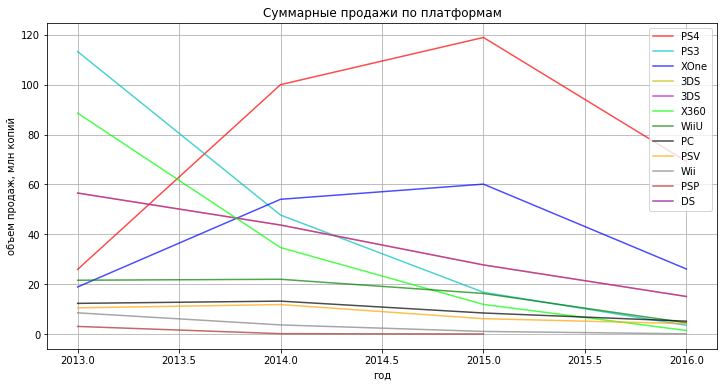

In [29]:
plt.figure(figsize=(12,6))

plt.plot(actual_data.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum(), label="PS4", alpha=0.7, color="r");
plt.plot(actual_data.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum(), label="PS3", alpha=0.7, color="c");
plt.plot(actual_data.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum(), label="XOne", alpha=0.7, color="b");
plt.plot(actual_data.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum(), label="3DS", alpha=0.7, color="y");
plt.plot(actual_data.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum(), label="3DS", alpha=0.7, color="m");
plt.plot(actual_data.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum(), label="X360", alpha=0.7, color="lime");
plt.plot(actual_data.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum(), label="WiiU", alpha=0.7, color="g");
plt.plot(actual_data.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum(), label="PC", alpha=0.7, color="black");
plt.plot(actual_data.query('platform == "PSV"').groupby('year_of_release')['total_sales'].sum(), label="PSV", alpha=0.7, color="orange");
plt.plot(actual_data.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum(), label="Wii", alpha=0.7, color="grey");
plt.plot(actual_data.query('platform == "PSP"').groupby('year_of_release')['total_sales'].sum(), label="PSP", alpha=0.7, color="brown");
plt.plot(actual_data.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum(), label="DS", alpha=0.7, color="purple");

plt.xlabel("год")
plt.ylabel("объем продаж, млн копий")
plt.title("Суммарные продажи по платформам")
plt.style="o-"
plt.grid()
plt.legend()
plt.show();

Многие популярные платформы уже завершают свой жизненный цикл в **10 лет**, но есть **2** платформы, которые стартовали где-то в районе **2012 года** и являются перспективными: `PS4` и `XOne`. Платформа `3DS`еще не закончила свой жизненный цикл. Интересно что платформа `РС`и `PSV` показывают практически идентичные продажи во времени.

### Ящики с усами для перспективных платформ

Построим ящики с усами для пятерки перспективных платформ

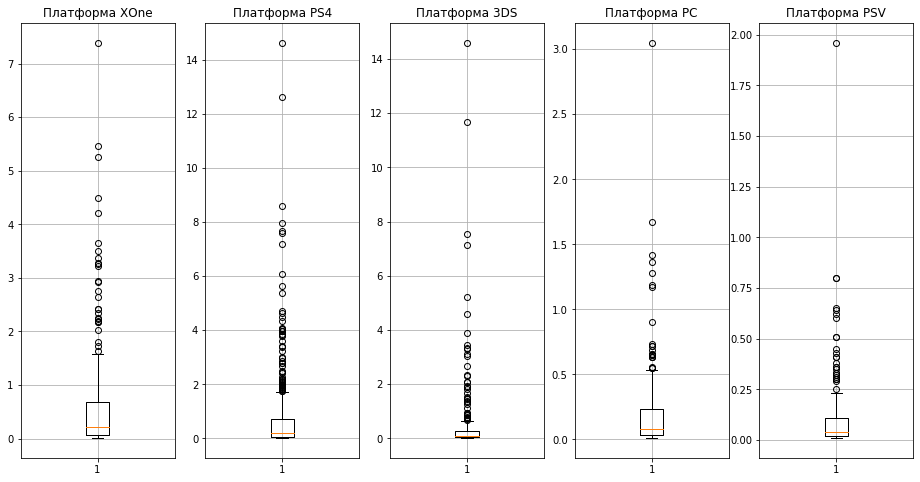

In [30]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16,8))

ax1.boxplot(actual_data.query('platform == "XOne"')['total_sales'])
ax1.set_title("Платформа XOne")
ax1.grid()
ax2.boxplot(actual_data.query('platform == "PS4"')['total_sales'])
ax2.set_title("Платформа PS4")
ax2.grid()
ax3.boxplot(actual_data.query('platform == "3DS"')['total_sales'])
ax3.set_title("Платформа 3DS")
ax3.grid()
ax4.boxplot(actual_data.query('platform == "PC"')['total_sales'])
ax4.set_title("Платформа PC")
ax4.grid()
ax5.boxplot(actual_data.query('platform == "PSV"')['total_sales'])
ax5.set_title("Платформа PSV")
ax5.grid()

По всем платформам наблюдаем выбросы и скошенность распределения. По платформе `3DS` очень много выбросов. Чтобы поточнее посмотреть на медианные  значения отсечем обьемы продаж выше 1.5млн.копий.

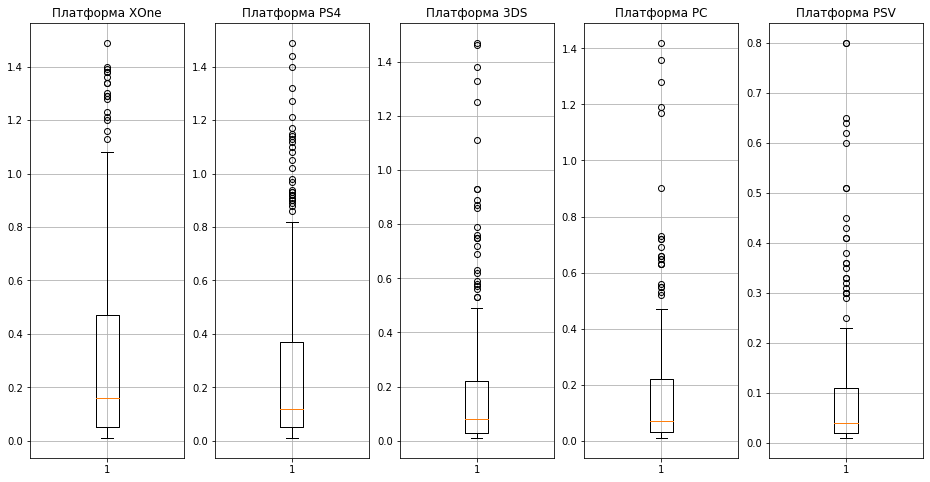

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16,8))

ax1.boxplot(actual_data.query('platform == "XOne" and total_sales < 1.5')['total_sales'])
ax1.set_title("Платформа XOne")
ax1.grid()
ax2.boxplot(actual_data.query('platform == "PS4" and total_sales < 1.5')['total_sales'])
ax2.set_title("Платформа PS4")
ax2.grid()
ax3.boxplot(actual_data.query('platform == "3DS" and total_sales < 1.5')['total_sales'])
ax3.set_title("Платформа 3DS")
ax3.grid()
ax4.boxplot(actual_data.query('platform == "PC" and total_sales < 1.5')['total_sales'])
ax4.set_title("Платформа PC")
ax4.grid()
ax5.boxplot(actual_data.query('platform == "PSV" and total_sales < 1.5')['total_sales'])
ax5.set_title("Платформа PSV")
ax5.grid()

Медианные уровни продаж у `PS4` приблизительно находятся на уровне **0,1**, у `XOne` чуть повыше. а у `3DS` и `PSV` и `РС` самые низкие.

### Влияние отзывов на продажи внутри одной платформы

Для анализа продаж внутри одной популярной платформы возьмем `PS4`.

In [32]:
# создадим новый датасет с нужными столбцами без пропусков
actual_data_1 = actual_data[["platform", "critic_score", "user_score", "total_sales"]].dropna()

actual_data_ps4 = actual_data_1.query('platform == "PS4"').reset_index(drop=True)
actual_data_ps4

,platform,critic_score,user_score,total_sales
0,PS4,97.0,8.3,12.62
1,PS4,82.0,4.3,8.58
2,PS4,83.0,5.7,7.66
3,PS4,85.0,5.0,7.60
4,PS4,87.0,6.5,7.17
...,...,...,...,...
244,PS4,42.0,2.3,0.01
245,PS4,70.0,6.8,0.01
246,PS4,69.0,7.5,0.01
247,PS4,61.0,7.9,0.01


Посмотрим на корреляцию между продажами и оценками

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


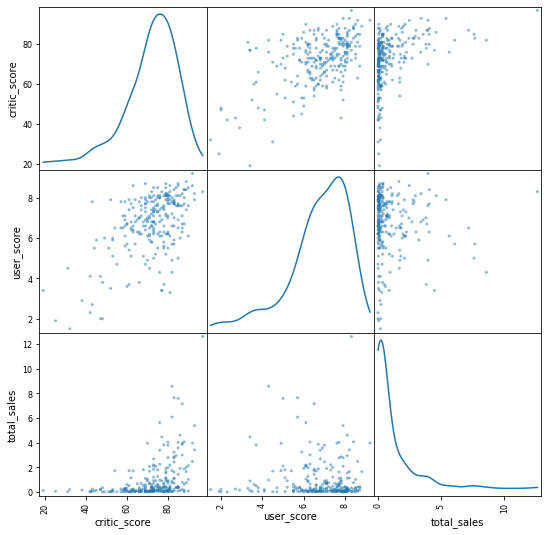

In [33]:
# рассчитаем корреляцию
display(actual_data_ps4.corr())

# построим матрицу диаграм рассеивания
pd.plotting.scatter_matrix(actual_data_ps4, diagonal="kde", figsize=(9,9))
plt.show()

Корреляция между оценками пользователей и продажами отсутствует. Оценки критиков имеют среднюю корреляцию на продажи. Зависимость прямопропорциональная: чем выше оценка тем больше продаж.

### Зависимость продаж от рейтингов на других платформах

Соотнесем выводы с продажами игр на других популярных платформах.

In [34]:
actual_data_1.query('platform == "XOne"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales,0.410422,-0.094003,1.000000


In [35]:
actual_data_1.query('platform == "3DS"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.769536,0.339235
user_score,0.769536,1.000000,0.272990
total_sales,0.339235,0.272990,1.000000


In [36]:
actual_data_1.query('platform == "PC"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.429562,0.194124
user_score,0.429562,1.000000,-0.109235
total_sales,0.194124,-0.109235,1.000000


In [37]:
actual_data_1.query('platform == "PSV"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.611521,0.254100
user_score,0.611521,1.000000,0.265478
total_sales,0.254100,0.265478,1.000000


На `XOne` картинка похожая на `PS4`.В целом видим что оценки очень слабо влияют на продажи. Зависимость продаж прямопропорциональная.

### Распределение игр и продаж по жанрам

Посмотрим на распределение игр по жанрам

,genre,name
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


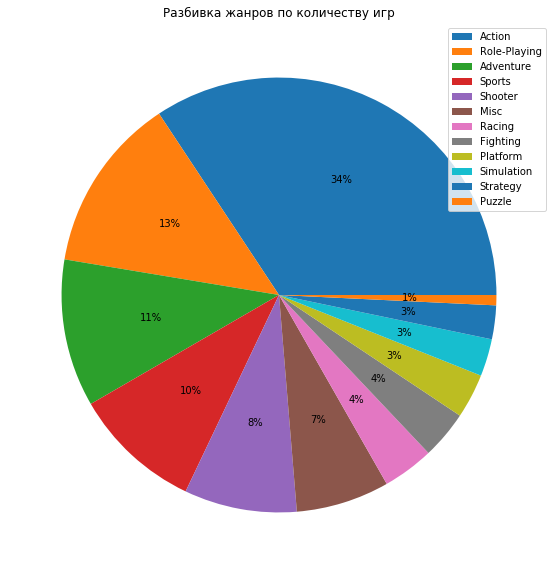

In [38]:
# группировка по жанрам
actual_data_name = actual_data.groupby('genre')["name"].count().sort_values(ascending=False)
display(actual_data_name.reset_index())

# круговая диаграмма
actual_data_name.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Разбивка жанров по количеству игр')
plt.show()

Больше всего игр выпускалось в жанре `Action`, `Role-Playing`, `Adventure`. Меньше всего - `Strategy`, `Puzzle`, `Simulation`

Теперь посмотрим седианные обьемы продаж по жанрам, чтоб определить наиболее стабильные по прибыльности.

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


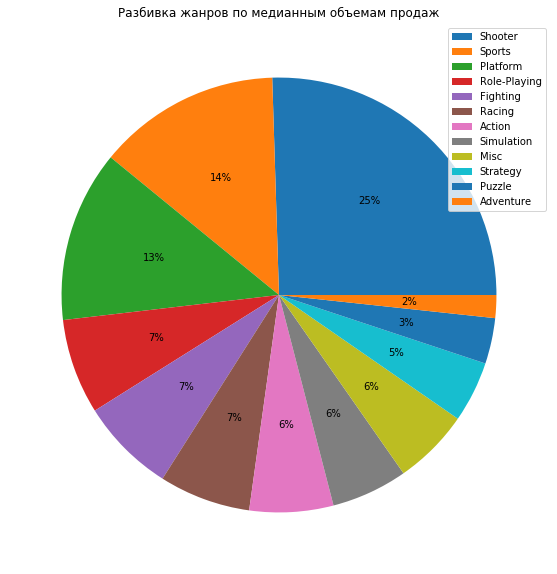

In [39]:
# группировка по жанрам с суммированием продаж
actual_data_sales = actual_data.groupby('genre')["total_sales"].median().sort_values(ascending=False)
display(actual_data_sales.reset_index())

# круговая диаграмма
actual_data_sales.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Разбивка жанров по медианным объемам продаж')
plt.show()

По медианным объемам продаж жанр `Shooter` находится на первом месте. На втором `Sports`, а вот на третьем - `Platform`. Меньше всего медианные продажи игр в жанре `Adventure`.

## Портрет пользователя

### Самые популярные платформы

Определим самые популярные платформы по регионам

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


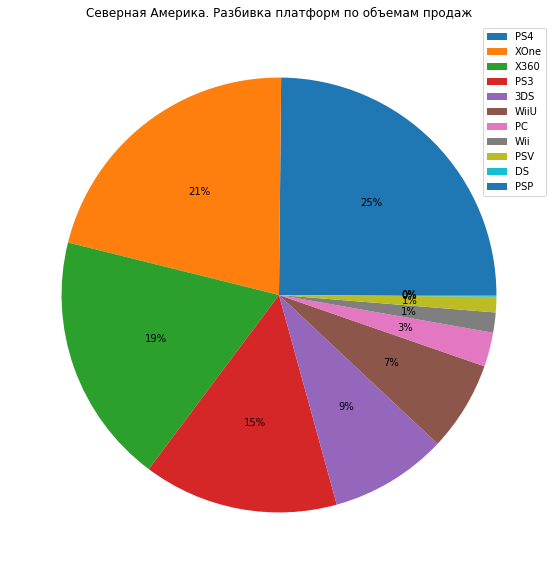

In [40]:
# группировка по Северной Америке
actual_data_na_sales_pl = actual_data.groupby('platform')["na_sales"].sum().sort_values(ascending=False)
display(actual_data_na_sales_pl.reset_index())

# круговая диаграмма
actual_data_na_sales_pl.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Северная Америка. Разбивка платформ по объемам продаж')
plt.show()

В **Северной Америке** самые популярные платформы `PS4`, `XOne`, `X360`.

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.36
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


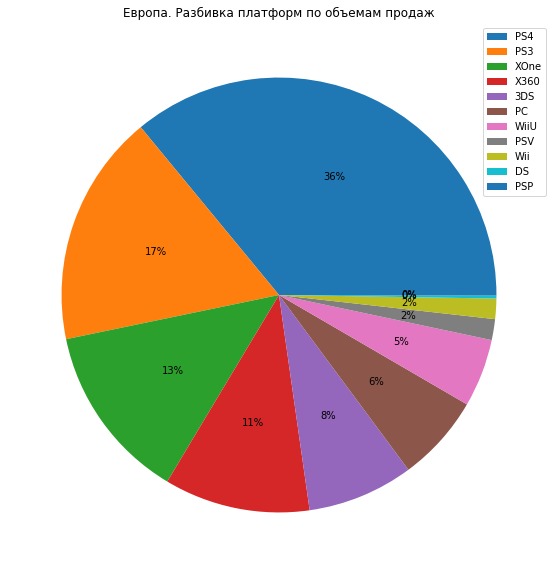

In [41]:
# группировка по Европе
actual_data_eu_sales_pl = actual_data.groupby('platform')["eu_sales"].sum().sort_values(ascending=False)
display(actual_data_eu_sales_pl.reset_index())

# круговая диаграмма
actual_data_eu_sales_pl.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Европа. Разбивка платформ по объемам продаж')
plt.show()

В **Европе** лидеры практически те же `PS4`, `XOne`, только вместо `X360` - `PS3`.

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.29
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,PC,0.00


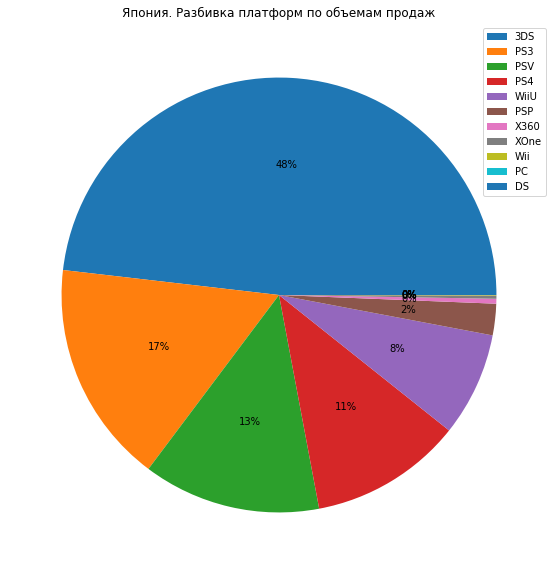

In [42]:
# группировка по Японии
actual_data_jp_sales_pl = actual_data.groupby('platform')["jp_sales"].sum().sort_values(ascending=False)
display(actual_data_jp_sales_pl.reset_index())

# круговая диаграмма
actual_data_jp_sales_pl.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Япония. Разбивка платформ по объемам продаж')
plt.show()

А вот в **Японии** рынок другой. Только один лидер общий - `PS3`, остальные `3DS` и `DS` популярны только для Японии. При чем `3DS`занимает 48% рынка.

### Самые популярные жанры

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


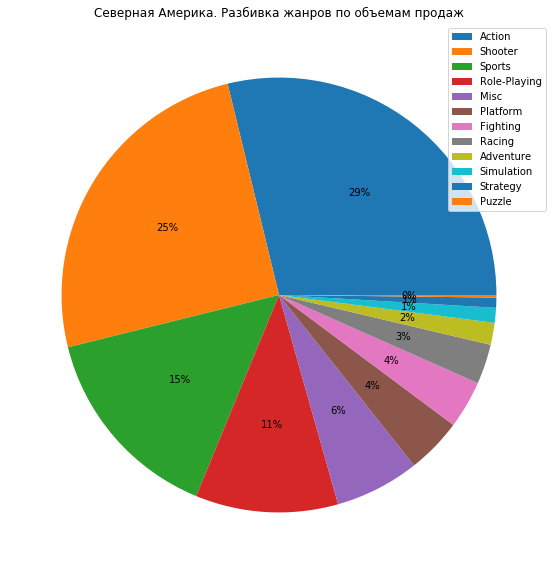

In [43]:
# группировка по жанрам с суммированием продаж в Северной Америке
actual_data_na_sales_g = actual_data.groupby('genre')["na_sales"].sum().sort_values(ascending=False)
display(actual_data_na_sales_g.reset_index())

# круговая диаграмма
actual_data_na_sales_g.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Северная Америка. Разбивка жанров по объемам продаж')
plt.show()

По обьемам продаж в **Северной Америке** топ-3 жанра: `Action`, `Shooter` и `Sports`. Игры жанра `Puzzle` не пользуются популярностью в этом регионе.

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


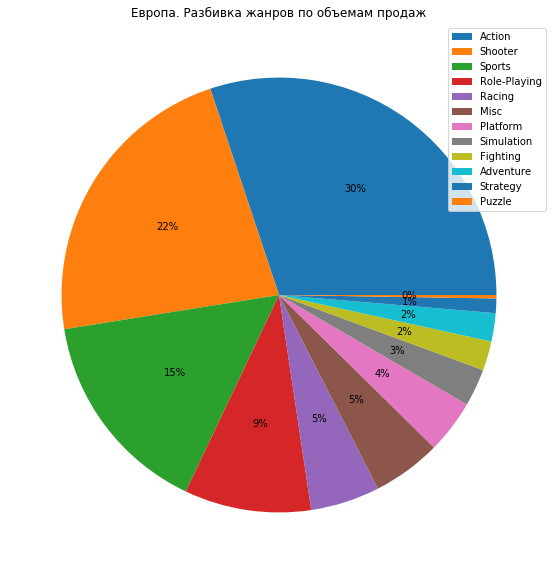

In [44]:
# группировка по жанрам с суммированием продаж в Европе
actual_data_eu_sales_g = actual_data.groupby('genre')["eu_sales"].sum().sort_values(ascending=False)
display(actual_data_eu_sales_g.reset_index())

# круговая диаграмма
actual_data_eu_sales_g.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Европа. Разбивка жанров по объемам продаж')
plt.show()

В **Европе** картинка аналогичная, и даже в аутсайдерах тот же жанр `Puzzle`.	

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,Adventure,5.82
6,Sports,5.41
7,Platform,4.79
8,Simulation,4.52
9,Racing,2.30


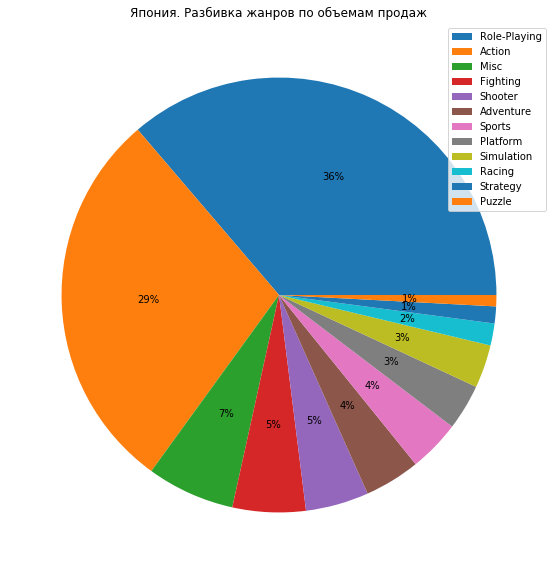

In [45]:
# группировка по жанрам с суммированием продаж в Японии
actual_data_jp_sales_g = actual_data.groupby('genre')["jp_sales"].sum().sort_values(ascending=False)
display(actual_data_jp_sales_g.reset_index())

# круговая диаграмма
actual_data_jp_sales_g.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Япония. Разбивка жанров по объемам продаж')
plt.show()

А вот **Японский рынок** очень сильно отличается. На первом месте по обьемам продаж здесь жанр `Role-Playing`. На втором и третьем `Action`	и `Misc` соответственно. Но как и в Европе и Америке меньше всего игр жанра `Puzzle` продается.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. 

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Источник: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Как помним у нас было много пропущенных значений в колонке с рейтингом. Чтобы посмотреть продажи по играм без рейтинга заменим пропуски на значение `not_rating`.

In [46]:
actual_data["rating"] = actual_data["rating"].fillna("not_rating")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
rating = actual_data.groupby("rating")["na_sales", "eu_sales", "jp_sales"].sum().sort_values(by="na_sales", ascending=False).reset_index()
rating

,rating,na_sales,eu_sales,jp_sales
0,M,165.21,145.32,14.11
1,not_rating,89.42,78.91,85.05
2,E,79.05,83.36,15.14
3,E10+,54.24,42.69,5.89
4,T,49.79,41.95,20.59


Основной рейтинг в **Северной Америке** и **Европе** - `М`, а вот в **Японии** - `Е`, но следует отметить что в Японии большая часть игр вообще не имеет рейтинга, видимо для них это не так важно.

## Проверка гипотез

Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Гипотеза о средних  пользовательских рейтингах Xbox One и PC

Выберем данные для проверки гипотезы и запишем их в отдельные переменнные. Уберем значения nan.

In [48]:
x_one = actual_data.query('platform == "XOne"')["user_score"].dropna().to_list()
pc = actual_data.query('platform == "PC"')["user_score"].dropna().to_list()

Посчитаем дисперсии для выборок, чтобы понять равны ли они

In [49]:
print("Дисперсия по рейтингу платформы Xbox One:", np.var(x_one))
print("Дисперсия по рейтингу платформы PC:", np.var(pc))

Дисперсия по рейтингу платформы Xbox One: 1.8965188383045526
Дисперсия по рейтингу платформы PC: 3.016306347554631


Дисперсии сильно отличаются поэтому параметр `equal_var` поставим `False`.

`alpha` выберем равным **0,05**, т.к. сверхточность нам ни к чему.

Теперь нужно сформулировать нулевую и альтернативную гипотезу.
Т.к.по теории мы знаем, что нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства она будет звучать так: **"Средние пользовательские рейтинги платформ Xbox One и PC равны"**. Альтернативная гипотеза: **"Средние пользовательские рейтинги платформ Xbox One и PC различаются"**. Так как мы не знаем в какую сторону проверять различие тест будет двухсторонним.

In [50]:
alpha = 0.05
results = st.ttest_ind(
    x_one, 
    pc, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Мы не отвергаем нулевую гипотезу. Значит **не отвергаем** и гипотезу, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны.

### Гипотезы о средних жанров Action и Sports

Вторая гипотеза. которую нужно проверить звучит так: "средние пользовательские рейтинги жанров `Action` и `Sports` разные".

`alpha` оставим на уровне **0.05**.

Запишем в новых переменных данные о пользовательский рейтингах этих двух жанров

In [51]:
action = actual_data.query('genre == "Action"')["user_score"].dropna().to_list()
sports = actual_data.query('genre == "Sports"')["user_score"].dropna().to_list()

Посмотрим на дисперсии

In [52]:
print("Дисперсия по рейтингу жанра Action:", np.var(action))
print("Дисперсия по рейтингу жанра Sports:", np.var(sports))

Дисперсия по рейтингу жанра Action: 1.7648124186332366
Дисперсия по рейтингу жанра Sports: 3.160733984375


Дисперсии сильно отличаются - параметр `equal_var` поставим `False`.

Осталось сформулировать нулевую и альтернативную гипотезу. Нулевая гипотеза будет звучать так: **"средние пользовательские рейтинги жанров Action и Sports равны"**. Альтернативная тогда - **"средние пользовательские рейтинги жанров Action и Sports разные"**.

In [53]:
alpha = 0.05
results = st.ttest_ind(
    action, 
    sports, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Значит **не отвергаем** гипотезу о том что средние пользовательские рейтинги жанров `Action` и `Sports` разные.

## Общий вывод

Для анализа мы получили датасет с продажами игр с **1980** по **2016гг**. Необходимо было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

В датасете у нас **11559** уникальных названий игр. Самое часто встречающееся название игры - **Need for Speed: Most Wanted**. Из **31** одной платформы чаще всего встречается `PS2`. Жанров всего **12**, видимо самый популярный - Action. Чаще всего в колонке с рейтингами встречается рейтинг Е

В процессе предобработки перевели столбцы `Year_of_Release` и `User_Score` к нужным типам данных. Удалили всего **2** строки, не содержащие название игр и жанров, т.к.не было возможности их восстановить. Посчитали суммарные объемы продаж каждой игры.

**Результаты анализа данных:**
- С начала зарождения игровой индустрии игр выпускалось мало. Стабильный рост начался около 1993года и достиг пика в 2008-2009гг, а дальше начинается спад и даже провал в районе 2012года. Это можно связать с активным началом продаж мобильных игр. Дальше рынок стабилизировался. Я бы назвала актуальным период с **2013г** по **2016г**.
- Срок существования платформы можно оценить в среднем в 10 лет, распределение продаж по большей части похоже на нормальное. Интересна платформа `DS`, которая просуществовала с **1985г** аж по **2013год**.
- Многие популярные платформы уже завершают свой жизненный цикл в 10 лет, но есть **2** платформы, которые стартовали где-то в районе **2013** года и являются перспективными: `PS4` и `XOne`. Несколько платформ слабо развиваются, но впринципе их жизненный цикл еще далек от завершения: `3DS`, `PSV`. Можно продолжать их продавать. Интересно что платформа `РС` не показывает огромных продаж, но актуальна всегда.
- Медианные уровни продаж у `PS4` приблизительно находятся на уровне **0,1**, у `XOne` чуть повыше. а у `3DS` и `PSV` и `РС` самые низкие.
- Корреляция между оценками критиков, оценками пользователей и продажами слабая. Но при этом оценки критиков больше влияют на продажи, чем оценки пользователей. Зависимость прямопропорциональная: чем выше оценка тем больше продаж. В `PS4` и `XOne` оценки пользователей вообще не влияют на продажи. В `PSV` оценки критиков влияют очень слабо.
- Больше всего игр выпускалось в жанре `Action`, `Role-Playing`, `Adventure`. Меньше всего - `Strategy`, `Puzzle`, `Simulation`. По медианным продажам жанр `Shooter` находится на первом месте. На втором `Sports`, а вот на третьем - `Platform`. Меньше всего медианные продажи игр в жанре `Adventure`.

**Портрет пользователя:**
- В **Северной Америке** самые популярные платформы `PS4`, `XOne`, `X360`. В **Европе** лидеры практически те же `PS4`, `XOne`, только вместо `X360` - `PS3`. А вот в **Японии** рынок другой. Только один лидер общий - `PS3`, остальные `3DS` и `DS` популярны только для Японии. При чем `3DS`занимает 48% рынка.
- По обьемам продаж в **Северной Америке** топ-3 жанра: `Action`, `Shooter` и `Sports`. Игры жанра `Puzzle` не пользуются популярностью в этом регионе. В **Европе** картинка аналогичная. А вот **Японский рынок** очень сильно отличается. На первом месте по обьемам продаж здесь жанр `Role-Playing`. На втором и третьем `Action`	и `Misc` соответственно. Но как и в Европе меньше всего игр жанра `Puzzle` продается.
- Основной рейтинг в **Северной Америке** и **Европе** - `М`, а вот в **Японии** - `Е`, но следует отметить что в Японии большая часть игр вообще не имеет рейтинга, видимо для них это не так важно.

**Гипотезы:**
- Гипотезу, что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны **не смогли отвергнуть**.
- Гипотезу о том что средние пользовательские рейтинги жанров `Action` и `Sports` разные **также не отвергаем**.

**Рекомендации для заказчика:**
- Делать ставки на платформы у которых еще не окончен жизненный цикл. В первую очередь `PS4` и `XOne`, а также `3DS`, `PSV`.
- Продавать игры наиболее популярных жанров: `Action`, `Sports`, `Shooter`. И отдельно не забывать про Японию продавая игры жанра `Role-Playing`.
- Не забывать про платформу `РС`, она не показывает высоких продаж, но актуальна всегда.